In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import healpy as hp

# Agricultural Land Classification

Agricultural Land Classification data for England can be downloaded here https://data.gov.uk/dataset/952421ec-da63-4569-817d-4d6399df40a1/provisional-agricultural-land-classification-alc 
Agricultural land classified into five grades. Grade one is best quality and grade five is poorest quality.
Data includes England only.

In this notebook we plot the land classification within the historic county of Yorkshire. To obtain the Yorkshire county boundaries we use Boundary-Lane data from the Ordnance Survey Data Hub https://osdatahub.os.uk/downloads/open/BoundaryLine, which can be accessed for free by selecting the GeoPackage data format, and extracting the `bdline_gb.gpkg` file.

In [2]:
border_file = '../../data/land/bdline_gb.gpkg' 
alc_file = '../../data/land/NE_AgriculturalLandClassificationProvisionalEngland_FGDB/data.gdb/'

In [3]:
yorkshire_index = 66
counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
polygon = counties['geometry'].iloc[yorkshire_index]
counties

,Name,Area_Description,geometry
0,Berkshire,Historic County,"MULTIPOLYGON (((422004.502 199086.601, 422030...."
1,Buckinghamshire,Historic County,"MULTIPOLYGON (((460619.899 235588.003, 460625...."
2,Hertfordshire,Historic County,"MULTIPOLYGON (((499772.602 215220.503, 499795...."
3,Herefordshire,Historic County,"MULTIPOLYGON (((335069.501 272770.499, 335082...."
4,Oxfordshire,Historic County,"MULTIPOLYGON (((424473.304 224921.896, 424502...."
...,...,...,...
90,Warwickshire,Historic County,"MULTIPOLYGON (((456472.501 274014.303, 456299...."
91,Dorset,Historic County,"MULTIPOLYGON (((333203.198 91375.703, 333185.9..."
92,Devon,Historic County,"MULTIPOLYGON (((333223.945 91353.145, 333218.0..."
93,Banffshire,Historic County,"MULTIPOLYGON (((349516.703 868874.397, 349519...."


In [4]:
city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

In [5]:
alc = gpd.read_file(alc_file, mask = polygon)
alc

,geogext,ne_ne_admin_ne_agricultural_land_classification_provisional_engl,alc_grade,perimeter,shape_leng,shape_Length,shape_Area,geometry
0,M59J,942.1277,Grade 3,18581.668,18581.667808,18581.667808,9.421277e+06,"MULTIPOLYGON (((361710.000 486674.273, 362213...."
1,M59J,2779.4511,Grade 4,75890.818,75890.817695,75890.817694,2.779451e+07,"MULTIPOLYGON (((366852.483 492413.885, 366687...."
2,M59J,6920.5087,Grade 5,77055.780,77055.780055,77055.780055,6.920509e+07,"MULTIPOLYGON (((363656.712 488841.610, 365480...."
3,M594,7576.3830,Grade 5,62770.201,62770.200960,62770.200960,7.576383e+07,"MULTIPOLYGON (((382820.000 514160.000, 382740...."
4,M594,1440.1870,Grade 4,41455.935,41455.934853,41455.934853,1.440187e+07,"MULTIPOLYGON (((398934.944 516016.457, 399323...."
...,...,...,...,...,...,...,...,...
180,9,3483.0100,Urban,55517.719,55517.719225,55517.719225,3.483010e+07,"MULTIPOLYGON (((458230.000 455260.000, 458420...."
181,4,270.5243,Grade 2,10556.533,10556.533213,10556.533213,2.705243e+06,"MULTIPOLYGON (((462266.342 522225.004, 461881...."
182,4,130.9334,Grade 3,7086.925,7086.924806,7086.924806,1.309334e+06,"MULTIPOLYGON (((465070.285 522358.049, 464636...."
183,4,616.6531,Non Agricultural,19874.127,19874.127001,19874.127001,6.166531e+06,"MULTIPOLYGON (((455655.585 528399.549, 455702...."


In [6]:
# Make sure both maps are using the same coordinate system
counties = counties.to_crs(epsg=4326)
alc = alc.to_crs(epsg=4326)


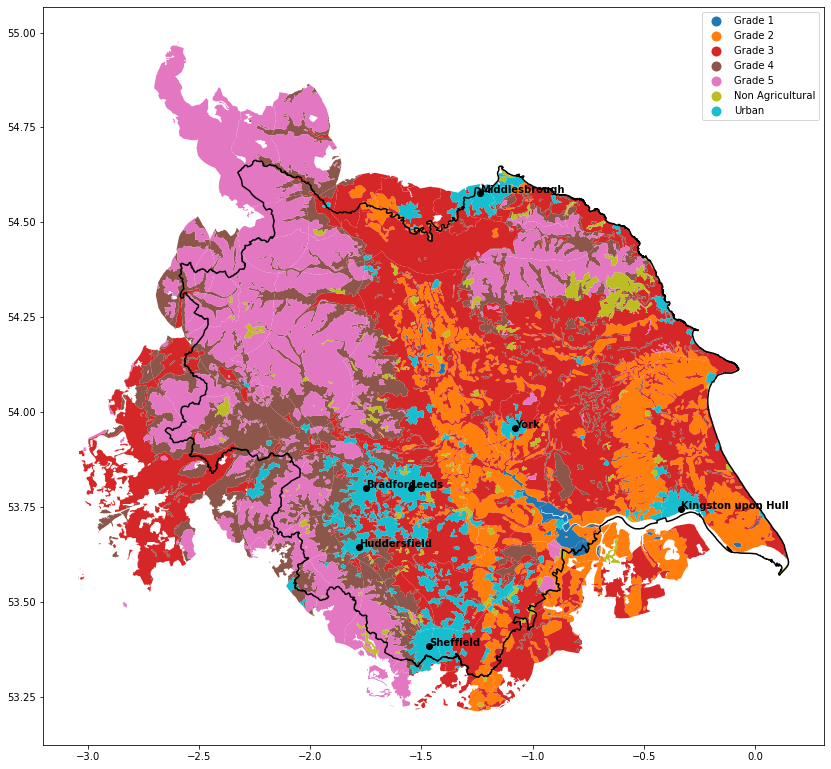

In [7]:
# Plot county boundary and crop polygons on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county
ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc.plot('alc_grade', ax=ax_base, legend=True, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);


In [8]:
grades = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade5', 'Non Agricultural', 'Urban']

alc_grade = {}
alc_grade["alc1"] = alc[alc['alc_grade'] == 'Grade 1']
alc_grade["alc2"] = alc[alc['alc_grade'] == 'Grade 2']
alc_grade["alc3"] = alc[alc['alc_grade'] == 'Grade 3']
alc_grade["alc4"] = alc[alc['alc_grade'] == 'Grade 4']
alc_grade["alc5"] = alc[alc['alc_grade'] == 'Grade 5']

alc_grade["alc6"] = alc[alc['alc_grade'] == 'Non Agricultural']

alc_grade["alc7"] = alc[alc['alc_grade'] == 'Urban']

In [9]:
alc_grade_y = {}
alc_grade_y_gdf = []
for ig, grade in enumerate(alc_grade.items()):
    s = gpd.GeoSeries(alc_grade[f'alc{ig+1}']['geometry'].buffer(0), crs='EPSG:4326')
   
    d = {'alc_grade' : grades[ig] , 'geometry' : s.intersection(counties.iloc[66]['geometry'])}
    
    gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
    alc_grade_y_gdf.append(gdf)


In [10]:
alc_grade_y_gdf_final = alc_grade_y_gdf[0]
for i in range(1,len(alc_grade_y_gdf)):
    alc_grade_y_gdf_final = alc_grade_y_gdf_final.merge(alc_grade_y_gdf[i], how='outer')
    
alc_grade_y_gdf_final.to_file('../../pyourfood/land/data/ALC/Yorkshire_ALC.gpkg', driver="GPKG")
alc_grade_y_gdf_final

,alc_grade,geometry
0,Grade 1,"MULTIPOLYGON (((-0.07189 53.64297, -0.07355 53..."
1,Grade 1,"POLYGON ((-0.83476 53.63990, -0.83415 53.64033..."
2,Grade 1,"MULTIPOLYGON (((-0.93254 53.76205, -0.93304 53..."
3,Grade 2,"MULTIPOLYGON (((-1.25164 53.30190, -1.25161 53..."
4,Grade 2,"MULTIPOLYGON (((-0.12977 53.65202, -0.08560 53..."
...,...,...
180,Urban,"MULTIPOLYGON (((-0.27259 54.18277, -0.27463 54..."
181,Urban,"MULTIPOLYGON (((-0.96492 53.60377, -0.96566 53..."
182,Urban,"MULTIPOLYGON (((-1.27803 53.72680, -1.27792 53..."
183,Urban,"MULTIPOLYGON (((-1.11338 53.99011, -1.11051 53..."


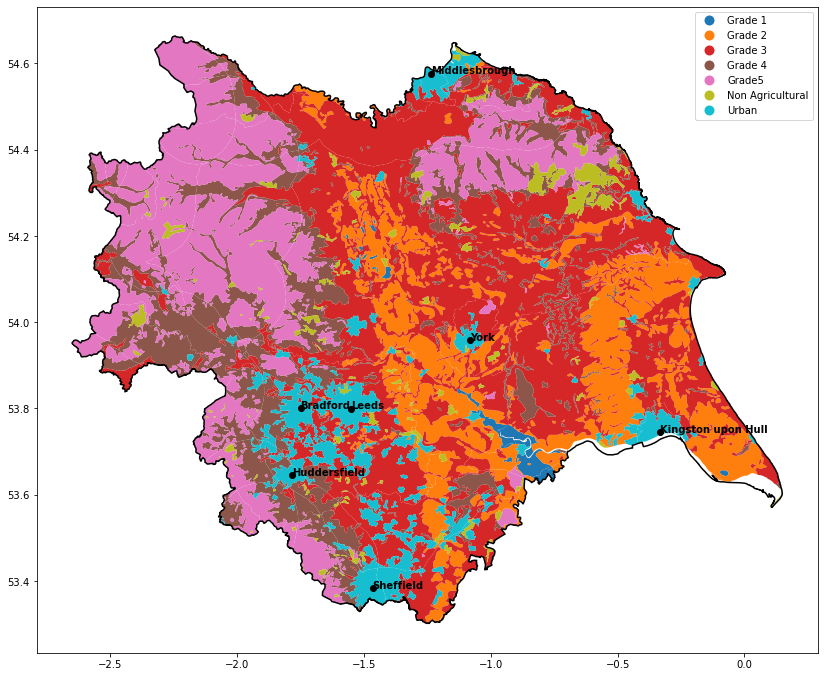

In [11]:
# Plot county boundary and crop positions on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county

ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc_grade_y_gdf_final.plot('alc_grade', ax=ax_base, markersize = 1, legend=True)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

# plt.xlim(-3.1,0.25);

# plt.savefig('geogext.png', dpi=200)